# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
import citipy #
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Prep query url with units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&q={city}&units={units}"

# Init lists to be filled with weather data
cityList = []
cloudiness = []
countries = []
dates = []
hums = []
lats = []
lngs = []
maxTemps = []
winds = []
cityCount = 0

# Start requests log
print(f"""
Beginning Data Retrieval
- - - - - - - - - - - - -
""")

# Loop through cities 
for city in cities:
    
    # Count cities
    cityCount = cityCount + 1
    
    # Make requests, pull data, and store in lists with error handling
    try:
        response = requests.get(f"{url}appid={api_key}&q={city}&units={units}").json()
        name = response["name"]
        print(f"Processing Record {cityCount} | {name}")
        cityList.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
        hums.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        maxTemps.append(response["main"]["temp_max"])
        winds.append(response["wind"]["speed"])
    except:
        print("City not found. Skipping...")
        
print(f"""
- - - - - - - - - - - - -
Data Retrieval Complete
- - - - - - - - - - - - -
""")




Beginning Data Retrieval
- - - - - - - - - - - - -

Processing Record 1 | Los Llanos de Aridane
Processing Record 2 | Saskylakh
Processing Record 3 | Rikitea
Processing Record 4 | Mataura
Processing Record 5 | San Cristobal
Processing Record 6 | Ushuaia
City not found. Skipping...
Processing Record 8 | Westport
Processing Record 9 | Vaini
Processing Record 10 | Nikolskoye
Processing Record 11 | Yerbogachen
Processing Record 12 | Barrow
Processing Record 13 | Albany
Processing Record 14 | Burns Lake
Processing Record 15 | Kapaa
Processing Record 16 | Mbanza-Ngungu
Processing Record 17 | Algiers
Processing Record 18 | Bambous Virieux
Processing Record 19 | Padang
City not found. Skipping...
Processing Record 21 | Chuy
City not found. Skipping...
Processing Record 23 | Cidreira
Processing Record 24 | Jamestown
Processing Record 25 | Ilulissat
Processing Record 26 | Staryy Nadym
Processing Record 27 | Waipawa
City not found. Skipping...
Processing Record 29 | Saint-Philippe
Processing Rec

Processing Record 253 | Igarka
Processing Record 254 | Palmer
Processing Record 255 | Laela
City not found. Skipping...
Processing Record 257 | Mango
Processing Record 258 | Buraydah
Processing Record 259 | Oksfjord
Processing Record 260 | Rocha
Processing Record 261 | Yenagoa
Processing Record 262 | Mayskiy
Processing Record 263 | Harper
Processing Record 264 | Sandur
Processing Record 265 | Tommot
Processing Record 266 | Beni
Processing Record 267 | Port-Gentil
Processing Record 268 | Kenai
Processing Record 269 | Aklavik
Processing Record 270 | Dromolaxia
City not found. Skipping...
Processing Record 272 | Panji
Processing Record 273 | Sabang
Processing Record 274 | Bandraboua
Processing Record 275 | Hay River
Processing Record 276 | Fort Nelson
Processing Record 277 | San Patricio
Processing Record 278 | Diglur
Processing Record 279 | Grants Pass
Processing Record 280 | Xifeng
Processing Record 281 | Pitkyaranta
Processing Record 282 | Verkhnyaya Maksakovka
Processing Record 283 | 

Processing Record 499 | Bubaque
Processing Record 500 | Dunedin
Processing Record 501 | Matagami
Processing Record 502 | Omboue
Processing Record 503 | Adrar
Processing Record 504 | Muscle Shoals
Processing Record 505 | Kokopo
Processing Record 506 | Fiche
Processing Record 507 | Vao
Processing Record 508 | Wanaka
Processing Record 509 | Bintulu
Processing Record 510 | Quelimane
Processing Record 511 | Rawson
Processing Record 512 | Torbay
Processing Record 513 | Drumheller
Processing Record 514 | Bridlington
Processing Record 515 | Beausejour
Processing Record 516 | Leningradskiy
Processing Record 517 | Lahaina
Processing Record 518 | Santa Rosalia
Processing Record 519 | Viedma
Processing Record 520 | Nome
Processing Record 521 | Pilar
Processing Record 522 | Kijang
Processing Record 523 | Keetmanshoop
Processing Record 524 | Chanika
Processing Record 525 | Chumikan
Processing Record 526 | Tabou
Processing Record 527 | Umm Lajj
City not found. Skipping...
City not found. Skipping...


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Zip rows
rows = zip(cityList,cloudiness,countries,dates,hums,lats,lngs,maxTemps,winds)
headers = ['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']

# Write to CSV
with open(output_data_file, "w") as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    for row in rows:
        writer.writerow(row)
        

In [12]:
# Create Dataframe
df = pd.read_csv(output_data_file)
df.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Los Llanos de Aridane,75,ES,1578187952,59,28.66,-17.92,64.40,9.17
1,Saskylakh,0,RU,1578187953,94,71.97,114.09,-20.18,7.49
2,Rikitea,67,PF,1578187953,80,-23.12,-134.97,76.08,18.99
3,Mataura,100,NZ,1578187953,68,-46.19,168.86,57.99,21.00
4,San Cristobal,19,HN,1578187953,96,14.68,-86.92,63.21,3.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

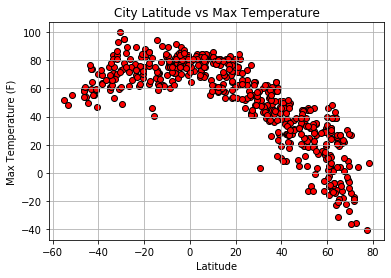

In [13]:
# Plot data with labels and save fig
plt.scatter(df['Lat'],df['Max Temp'],color='r',edgecolors='black')
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('Images/Temp.png')

#### Latitude vs. Humidity Plot

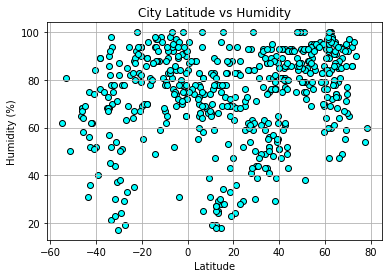

In [14]:
# Plot data with labels and save fig
plt.scatter(df['Lat'],df['Humidity'],color='aqua',edgecolors='black')
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('Images/Humidity.png')

#### Latitude vs. Cloudiness Plot

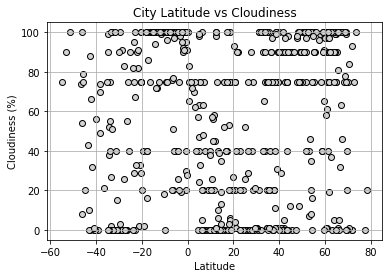

In [15]:
# Plot data with labels and save fig
plt.scatter(df['Lat'],df['Cloudiness'],color='lightgrey',edgecolors='black')
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('Images/Cloudiness.png')

#### Latitude vs. Wind Speed Plot

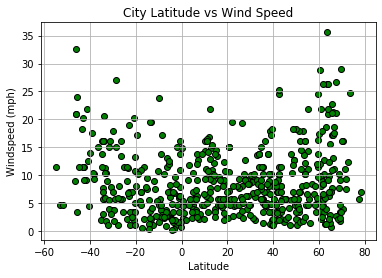

In [16]:
# Plot data with labels and save fig
plt.scatter(df['Lat'],df['Wind Speed'],color='green',edgecolors='black')
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.grid()
plt.savefig('Images/Wind.png')